In [2]:
import pandas as pd

# read csv to df:
path_to_csv = '/home/itay.nakash/projects/smooth_language/results/df_same_sen_61'
df = pd.read_csv(path_to_csv)

In [3]:
K_FOR_CORR = 22
numeric_df = df.select_dtypes(include=["number"])

# calculate corr matrix:
corr_matrix = numeric_df.corr()

# get the correlation matrix of the similarity feature:
corr_matrix_sim=corr_matrix['sim']

# get the top_k by abs that corelate to the similarity:
largest_abs_values = corr_matrix_sim.abs().nlargest(K_FOR_CORR)
k_largest_values = corr_matrix_sim.loc[largest_abs_values.index]
print(k_largest_values)


sim                          1.000000
layer                       -0.412502
bertscore_m_f1               0.376436
bertscore_m_p                0.347471
bertscore_m_r                0.346307
logits1_pred_cl             -0.334608
logits2_pred_cl             -0.333024
logits1_masked_cl           -0.301491
logits2_masked_cl           -0.286665
sen_len1                    -0.243288
sen_len2                    -0.235584
softmax2_pred_cl            -0.190466
softmax1_pred_cl            -0.190050
logits1_masked_cl_no_norm   -0.154450
logits2_masked_cl_no_norm   -0.150967
softmax1_masked_cl          -0.142275
logits2_pred_cl_no_norm     -0.140793
logits1_pred_cl_no_norm     -0.135488
softmax2_masked_cl          -0.132312
index1                       0.066807
index2                       0.062064
bertscore_nm_p              -0.039494
Name: sim, dtype: float64


In [4]:
columns_list_without_sim = numeric_df.drop("sim", axis=1).columns.tolist()

# Import the pandas and LinearRegression modules
import pandas as pd
from sklearn.linear_model import LinearRegression

# Create a LinearRegression object
regressor = LinearRegression()

numeric_wout_sim= numeric_df.drop(columns=['sim'])

# Fit the regressor to the data
regressor.fit(numeric_wout_sim, numeric_df["sim"])

# Print the sorted weights and their corresponding column names
weights = sorted(zip(numeric_df.columns, regressor.coef_), key=lambda x: x[1], reverse=True)
for col, weight in weights:
    print(f"{col}: {weight}")

bertscore_m_p: 22.959752824393277
logits2_pred_no_norm: 13.937414134162758
logits1_pred_no_norm: 8.13230224813508
bertscore_nm_r: 0.4969180358070782
correct2: 0.4237387889680269
softmax2_masked_no_norm: 0.07022447028050503
softmax1_masked_no_norm: 0.030163735913492345
softmax1_masked_cl: 0.026854751514806176
softmax2_masked_cl: 0.024756690849990416
softmax2_masked_cl_no_norm: 0.024357790801191413
logits1_pred_cl: 0.0216839337928197
logits2_pred_cl: 0.018945076228768235
std: 0.0059186589277476385
correct1: 0.004251139462563695
logits2_masked_no_norm: 0.0032498075619707078
logits1_masked_no_norm: 0.0024253265645433654
softmax1_pred_no_norm: 0.001770450755624943
logits1_masked: 0.00133714860681511
softmax1_pred: 0.000861570798677072
softmax2_pred: 0.0006130780582016516
bertscore_m_f1: 0.00013071342832872911
softmax2_pred_cl: 0.00010351405333289695
index1: 2.6917130991071387e-05
index2: 1.5799434284541928e-05
n_exampels: 7.241536988111807e-08
sim: -2.817957951012362e-08
Unnamed: 0: -9.0072

<AxesSubplot:>

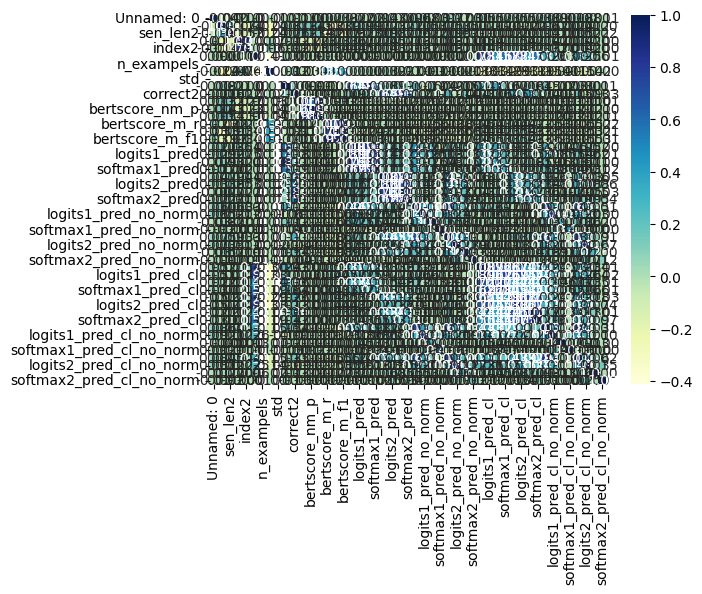

In [5]:
# too many features, not informative:

import seaborn as sns

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, 
            cmap="YlGnBu", 
            annot=True, 
            fmt=".2f")